In [6]:
from qiskit import QuantumCircuit, transpile, quantum_info
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
import numpy as np

In [53]:
# Function to generate a random number between 0 and 2^n - 1
def f(n):
    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1)
    
    # Apply Hadamard gate to create superposition state (|0> + |1>)
    qc.h(0)
    qc.measure_all()

    backend = AerSimulator()
    transpile_qc = transpile(qc, backend=backend, optimization_level=2)

    bits = []

    sampler = Sampler(backend)
    
    # Repeat the measurement n times to generate n bits
    for _ in range(n):
        # Run the circuit and retrieve measurement result
        job = sampler.run([(transpile_qc, None)])
        result = job.result()
        counts = result[0].data.meas.get_counts()
        n = list(counts.keys())[0]
        # Append the measured bit (0 or 1) to the list
        bits.append(n)

    # Join the bits and convert the binary string to an integer
    random_number = int("".join(bits), 2)
    
    # Return the final random number
    return random_number


In [70]:
#Uncomment and put your QXToken below in IBM QPU to run the function
#-------------------------------------------------------------------------------------
service = QiskitRuntimeService(channel = "ibm_quantum", # ibm_cloud
                               token = "9781d2bc283fc5b36aa3d7d3210063bc62f31d57772106fa686b49469564499762dd9118eda929b4e368dd7816d81f201651428dd0e0780d5d93207263e914ce")
backend = service.least_busy(simulator=False, operational=True)
#-------------------------------------------------------------------------------------

# backend = AerSimulator()

In [6]:
def g(n,backend):
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
    qc.measure_all()
    transpile_qc = transpile(qc, backend=backend, optimization_level=2)

    sampler = Sampler(backend)

    job = sampler.run([(transpile_qc,None,1)])
    result_qc = job.result()
    I = result_qc[0].data.meas.get_counts().keys()
    print(I)
    return int(list(I)[0],2)


In [72]:
# Error mitigation through Pauli Twirling

n = 2
shots = 400
qc = QuantumCircuit(n)
for i in range(n):
    qc.h(i)
qc.measure_all()
transpile_qc = transpile(qc, backend=backend, optimization_level=2)

sampler = Sampler(backend)

job = sampler.run([(transpile_qc,None,shots)])
print(job.job_id())

cw9stn2jyrs0008h0bd0


In [73]:
options = {
    "twirling": {
        "enable_gates": True,
        "enable_measure": True,
        "strategy": "active-circuit"
    }
}

sampler_twirl = Sampler(backend, options=options)
job_twirl = sampler_twirl.run([(transpile_qc,None,shots)])
print(job_twirl.job_id())

cw9stskjzdhg008eh1rg


In the cell below, we are comparing the counts of raw data and Noice-corrected data using "Pauli Twirling".

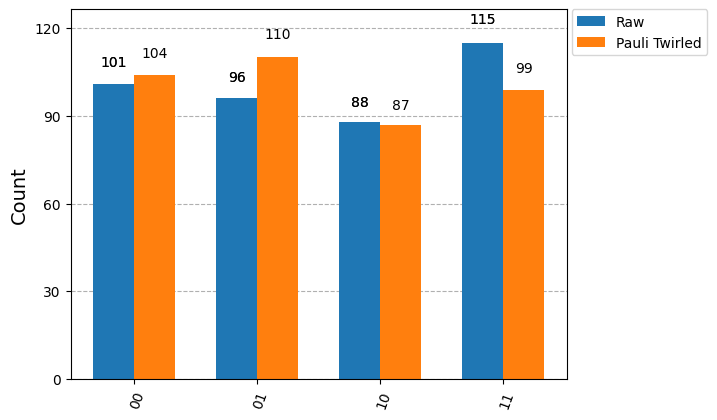

In [46]:
job = service.job('cw9stn2jyrs0008h0bd0')
job_twirl = service.job('cw9stskjzdhg008eh1rg')

result_qc_raw = job.result()
result_qc_twirl = job_twirl.result()

counts_qc_raw = result_qc_raw[0].data.meas.get_counts()
counts_qc_twirl = result_qc_twirl[0].data.meas.get_counts()

plot_histogram([counts_qc_raw, counts_qc_twirl], legend=['Raw', 'Pauli Twirled'])

In the following cell, we present the variances for both the raw data and the noise-corrected data obtained through "Pauli Twirling." 

It's important to note that a lower variance indicates a more reliable and stable dataset. As you can see, the variance for the noise-corrected data is significantly lower than that of the raw data. This suggests that the noise correction has effectively improved the quality of the data, making it the better choice for analysis.


In [51]:
var_raw = np.var(list(counts_qc_raw.values()))
var_twirl = np.var(list(counts_qc_twirl.values()))

print('Variance of Raw Data without any noise mitigation is applied:', var_raw)
print('Variance of Pauli Twirling Data without any noise mitigation is applied:', var_twirl)

Variance of Raw Data without any noise mitigation is applied: 96.5
Variance of Pauli Twirling Data without any noise mitigation is applied: 71.5


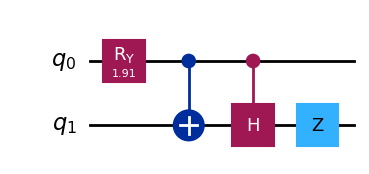

In [28]:
qc = QuantumCircuit(2)

qc.ry(2*np.arccos(1/np.sqrt(3)), 0)
qc.cx(0, 1)
qc.ch(0, 1)
qc.z(1)

qc.draw('mpl')

#quantum_info.Statevector(qc).draw('latex')


In [52]:

q5 = QuantumCircuit(3)

theta = 2 * np.arccos(np.sqrt(3/5))
q5.ry(theta,0)
# q5.h(1)
# q5.cx(1,2)
q5.ch(0,2)
q5.x(0)
q5.cry(2*np.arccos(1/np.sqrt(3)) , 0, 1)
q5.cx(1, 2)
q5.ch(1, 2)
q5.z(2)

q5.draw('mpl')

quantum_info.Statevector(q5).draw('latex')


<IPython.core.display.Latex object>

In [20]:
qc = QuantumCircuit(2)

qc.x(0)

quantum_info.Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

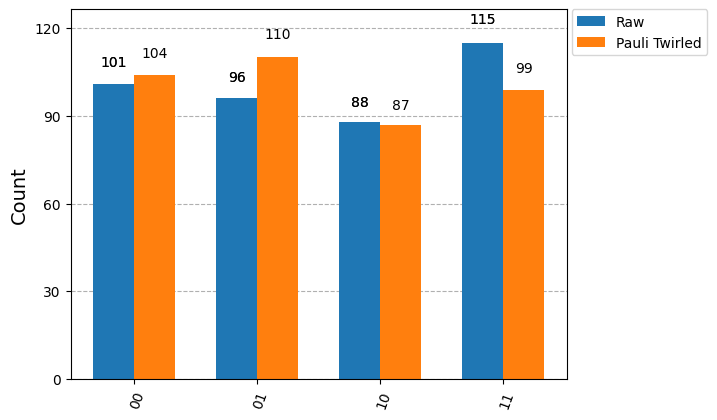

In [77]:
job = service.job('cw9qv54ggr6g0087tftg')
job_twirl = service.job('cw9qv9x9ezk000815td0')

result_qc_raw = job.result()
result_qc_twirl = job_twirl.result()

counts_qc_raw = result_qc_raw[0].data.meas.get_counts()
counts_qc_twirl = result_qc_twirl[0].data.meas.get_counts()

plot_histogram([counts_qc_raw, counts_qc_twirl], legend=['Raw', 'Pauli Twirled'])

In [78]:
var_raw = np.var(list(counts_qc_raw.values()))
var_twirl = np.var(list(counts_qc_twirl.values()))

print('Variance of Raw Data without any noise mitigation is applied:', var_raw)
print('Variance of Pauli Twirling Data without any noise mitigation is applied:', var_twirl)

Variance of Raw Data without any noise mitigation is applied: 96.5
Variance of Pauli Twirling Data without any noise mitigation is applied: 71.5
